![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
The goal of this project is to build a face identification model to recognize
faces.


### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [ ]:
import tensorflow
tensorflow.__version__

'2.3.0'

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Change current working directory to project folder (2 mark)

In [ ]:
##Change the local working directory to load the faces data
import os

project_path = "/content/drive/My Drive/GL_Colab/ACV/faceidentification/"

os.chdir(project_path)

In [ ]:
#check the folder contents
!ls -l

total 800305
-rw------- 1 root root    521368 Oct 22 16:00 AIML_AdvancedComputerVision_Project_FaceRecognition.ipynb
-rw------- 1 root root 238904640 Oct 10 06:17 PINS.zip
-rw------- 1 root root 580085408 Oct 10 05:40 vgg_face_weights.h5


### Extract the zip file (4 marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [ ]:
##Extract the dataset for use in model building and training
#Unzip and extract all the training images
from zipfile import ZipFile

with ZipFile(project_path+'PINS.zip', 'r') as z:
  z.extractall()

### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [ ]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

In [ ]:
#sanity to check metadata
metadata

array([PINS/pins_Aaron Paul/Aaron Paul0_262.jpg,
       PINS/pins_Aaron Paul/Aaron Paul101_247.jpg,
       PINS/pins_Aaron Paul/Aaron Paul101_248.jpg, ...,
       PINS/pins_zendaya/zendaya97.jpg, PINS/pins_zendaya/zendaya98.jpg,
       PINS/pins_zendaya/zendaya99.jpg], dtype=object)

### Define function to load image
- Define a function to load image from the metadata

In [ ]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (4 marks)
- Load one image using the function "load_image"

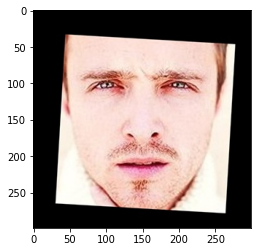

In [ ]:
#Sanity check and display one of the face image data
import matplotlib.pyplot as plt
plt.imshow(load_image(project_path + metadata[1].image_path()))

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (4 marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [ ]:
##Create the model architecture
model = vgg_face()

##Load the model pretrained model weights
model.load_weights(project_path + "vgg_face_weights.h5")


In [ ]:
##Check model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

In [ ]:
#Setting layers as non trainable to prevent any changes to the weights by mistake later
for layer in model.layers:
  layer.trainable = False

### Get vgg_face_descriptor

In [ ]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [ ]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


### Generate embeddings for all images (10 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [16]:
##Initialize the embeddings to all zeros

embeddings = np.zeros((metadata.shape[0], 2622))

#Go over each image and get embeddings. 
#If error ignore processing
for i, m in enumerate(metadata):
  

  #Read img path
  #If error the embedding is initialized already to zeros
  img_path = m.image_path()
  try:
    img = load_image(img_path)
  
    # Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
    img = (img / 255.).astype(np.float32)

    #resize to match the vgg input size
    img = cv2.resize(img, dsize = (224,224))
  
    #Obtain embedding vector for an image
    embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]

    #Update the embeddings list with this vector
    embeddings[i] = embedding_vector

  except:
    pass

In [17]:
#sanity
embeddings[0]

array([ 0.03170307, -0.0150513 , -0.01243402, ...,  0.00043141,
        0.00219081, -0.00908097])

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [18]:
#Utility function to calculate the distance b/w two images
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

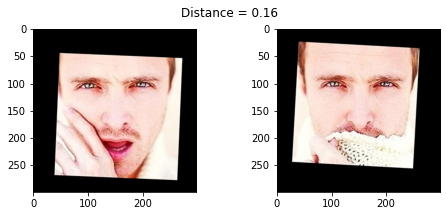

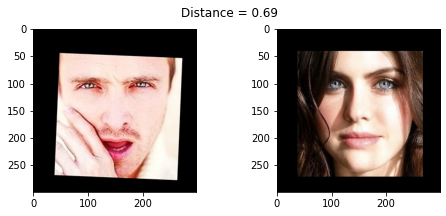

In [19]:
import matplotlib.pyplot as plt

#Utility function to display pairs of images and distance values
def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

### Create train and test sets (10 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [20]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0     #every 9th example goes in test data and rest go in train data
test_idx = np.arange(metadata.shape[0]) % 9 == 0

##Get the train image features
X_train = embeddings[train_idx]


#### Get the features of test images
X_test = embeddings[test_idx]

#labels for all the images
targets = np.array([m.name for m in metadata])
#train labels
y_train = targets[train_idx]
#test labels
y_test = targets[test_idx]
#### Add your code here ####

In [21]:
#sanity
print("Shape of X_train, X_test",X_train.shape, X_test.shape)
print("Shape of y_train, y_test",y_train.shape, y_test.shape)

Shape of X_train, X_test (9573, 2622) (1197, 2622)
Shape of y_train, y_test (9573,) (1197,)


### Encode the Labels (6 marks)
- Encode the targets
- Use LabelEncoder

In [22]:
from sklearn.preprocessing import LabelEncoder

#### Initialize the encoder####
le = LabelEncoder()

#fit on the train and then transform on both train and test data sets
le.fit(y_train)

#encode train
y_train_enc = le.transform(y_train)

#encode test
y_test_enc = le.transform(y_test)

In [23]:
#sanity
print(y_train[0], y_train_enc[0],y_test[0], y_test_enc[0])

pins_Aaron Paul 0 pins_Aaron Paul 0


### Standardize the feature values (6 marks)
- Scale the features using StandardScaler

In [24]:
# Standarize features
from sklearn.preprocessing import StandardScaler

#Initialize SC
sc = StandardScaler()

#fit on train and then transform on train and test
sc.fit(X_train)

#sc for train
X_train_sc = sc.transform(X_train)

#sc for test
X_test_sc = sc.transform(X_test)

In [25]:
#sanity
print(X_train[0], X_train_sc[0])
print(X_test[0], X_test_sc[0])

[ 0.03497704 -0.00105059 -0.01248933 ... -0.01053091  0.0017932
  0.02439154] [ 2.51890846 -0.05913743 -1.46600731 ...  0.36904366 -0.39026945
  0.83837775]
[ 0.03170307 -0.0150513  -0.01243402 ...  0.00043141  0.00219081
 -0.00908097] [ 2.17690438 -1.24446122 -1.46072116 ...  1.39978653 -0.35278688
 -1.73223686]


### Reduce dimensions using PCA (6 marks)
- Reduce feature dimensions using Principal Component Analysis
- Set the parameter n_components=128

In [26]:
from sklearn.decomposition import PCA

#Initialize PCA with n=128
pca = PCA(n_components=128)

#fit on the scaled train dataset
pca.fit(X_train_sc)

#transform train and test

X_train_pca = pca.transform(X_train_sc)

X_test_pca = pca.transform(X_test_sc)

In [27]:
#Sanity
print(X_train_sc.shape, X_train_pca.shape)
print(X_test_sc.shape, X_test_pca.shape)

(9573, 2622) (9573, 128)
(1197, 2622) (1197, 128)


In [28]:
#check the explained variance by the 128 components
sum(pca.explained_variance_ratio_)

0.8667654292967693

### Build a Classifier (6 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [29]:
from sklearn.svm import SVC


#initialize SVC with default parameters
svc = SVC()

#fit on the training data
svc.fit(X_train_pca,y_train_enc)

#Get the predictions
y_pred = svc.predict(X_test_pca)

#Get the accuracy score
svc.score(X_test_pca,y_test_enc)

#Almost 96% accuracy achieved

0.9615705931495405

In [30]:
#check the classification metrics
from sklearn.metrics import classification_report

print(classification_report(y_test_enc,y_pred))


              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.91      1.00      0.95        10
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        12
           4       1.00      0.86      0.92         7
           5       1.00      0.89      0.94         9
           6       0.88      1.00      0.93         7
           7       0.93      1.00      0.97        14
           8       0.93      1.00      0.97        14
           9       0.89      0.89      0.89         9
          10       0.87      0.93      0.90        14
          11       1.00      0.92      0.96        12
          12       1.00      1.00      1.00        10
          13       0.91      1.00      0.95        10
          14       1.00      1.00      1.00        15
          15       1.00      1.00      1.00        15
          16       0.92      0.92      0.92        12
          17       1.00    

In [34]:
#Some observations
#Below labels had accuracy lower than 90%. Label 75 and 87 were lowest with below 80% range
#9,20,29,36,39,44,68,73,75 (low),79,84,87 (low),97
print(le.inverse_transform([75]),le.inverse_transform([87]))

['pins_eliza taylor'] ['pins_maria pedraza']


### Test results (2 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

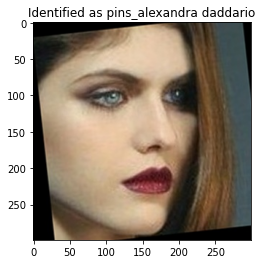

In [31]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = svc.predict(X_test_pca[example_idx].reshape(1,-1))   #### Scale the input and then apply pca before predicting
example_identity = le.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');